# Expresso Churn Prediction Challenge


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import joblib

## Parsing DataFrame

In [62]:
df = pd.read_csv("Expresso_churn_dataset.csv")

df


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [63]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [64]:
df.isnull().mean()* 100

user_id            0.000000
REGION            39.428044
TENURE             0.000000
MONTANT           35.131018
FREQUENCE_RECH    35.131018
REVENUE           33.706213
ARPU_SEGMENT      33.706213
FREQUENCE         33.706213
DATA_VOLUME       49.229776
ON_NET            36.520774
ORANGE            41.561191
TIGO              59.887988
ZONE1             92.120835
ZONE2             93.648052
MRG                0.000000
REGULARITY         0.000000
TOP_PACK          41.902223
FREQ_TOP_PACK     41.902223
CHURN              0.000000
dtype: float64

In [65]:
for cols in df.select_dtypes("number").columns:
    df[cols] = df[cols].fillna(df[cols].mean())

In [66]:
df.isnull().sum()

user_id                0
REGION            849299
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          902594
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

In [67]:
#Checking for the unique values in REGION
df["REGION"].unique()
#Filling the null values in region
df["REGION"]= df["REGION"].fillna("No Region")


In [68]:
df.isnull().sum()

user_id                0
REGION                 0
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          902594
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

CHURN
0    1750062
1     403986
Name: count, dtype: int64


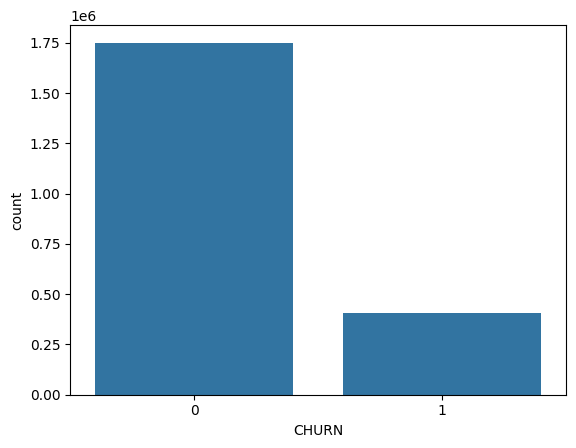

In [69]:
sns.countplot(df, x="CHURN")
print(df["CHURN"].value_counts())
plt.show()

In [70]:
#Checking for the number of rows where the CHURN is not null
df[~df.isnull().any(axis=1)]['CHURN'].value_counts()

CHURN
0    1201194
1      50260
Name: count, dtype: int64

In [71]:
#Checing for the rows where the CHURN have nulls in them
df[df.isnull().any(axis=1)]['CHURN'].value_counts()

CHURN
0    548868
1    353726
Name: count, dtype: int64

In [72]:
#Checking for the number of rows that is rows and columns that has null in them
df[df.isnull().any(axis=1)].shape

(902594, 19)

In [73]:
#Checking for the unique values in TENURE
df["TENURE"].unique()

array(['K > 24 month', 'I 18-21 month', 'G 12-15 month', 'H 15-18 month',
       'J 21-24 month', 'F 9-12 month', 'D 3-6 month', 'E 6-9 month'],
      dtype=object)

In [74]:
df_copy = df.copy()

encoder = LabelEncoder()
df["TENURE"] = encoder.fit_transform(df["TENURE"])

In [75]:
df.isnull().sum()

user_id                0
REGION                 0
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK          902594
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          int32  
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int32(1), int64(2), object(4)
memory usage: 304.0+ MB


In [77]:
#Droping the unnecessary colmuns
df.drop(columns = ["user_id", "MRG"], axis= 1 , inplace= True)
df.drop(columns = ["ZONE1", "ZONE2"], axis= 1 , inplace= True)

In [78]:
#Encoding the TOP PACK column
top_pack_encoder = LabelEncoder()

df["TOP_PACK"] = top_pack_encoder.fit_transform(df["TOP_PACK"])

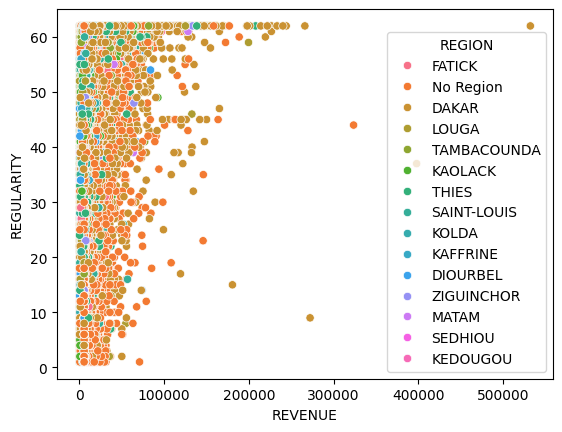

In [79]:
#Visualization of the dataframe using the variables: Revenue, Regularity and Region as the colour
sns.scatterplot(df, x = "REVENUE" , y = "REGULARITY", hue = "REGION")
plt.show()

In [80]:
#Getting dummy values for the categorical columns
dummy_df = pd.get_dummies(df, dtype= "int")
dummy_df.head(5)

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,...,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_No Region,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,7,4250.000000,15.00000,4251.000000,1417.000000,17.000000,4.000000,388.00000,46.000000,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,5,5532.116998,11.52912,5510.810334,1836.942894,13.978141,3366.450167,277.68914,95.418711,23.109253,...,0,0,0,0,1,0,0,0,0,0
2,7,3600.000000,2.00000,1020.000000,340.000000,2.000000,3366.450167,90.00000,46.000000,7.000000,...,0,0,0,0,1,0,0,0,0,0
3,7,13500.000000,15.00000,13502.000000,4501.000000,18.000000,43804.000000,41.00000,102.000000,2.000000,...,0,0,0,0,0,0,0,0,0,0
4,7,1000.000000,1.00000,985.000000,328.000000,1.000000,3366.450167,39.00000,24.000000,23.109253,...,0,0,0,0,0,0,0,0,0,0


In [81]:
#Checking for where the ORANGE is null. in order to check if there's any form of correlation between the columns
dummy_df[["ORANGE","TIGO" ]].loc[dummy_df["ORANGE"].isnull()]

,ORANGE,TIGO


In [82]:
#dropping the columns  because calling orange or tigo doesn't matter
dummy_df.drop(columns = ["ORANGE", "TIGO"], axis = 1, inplace = True)

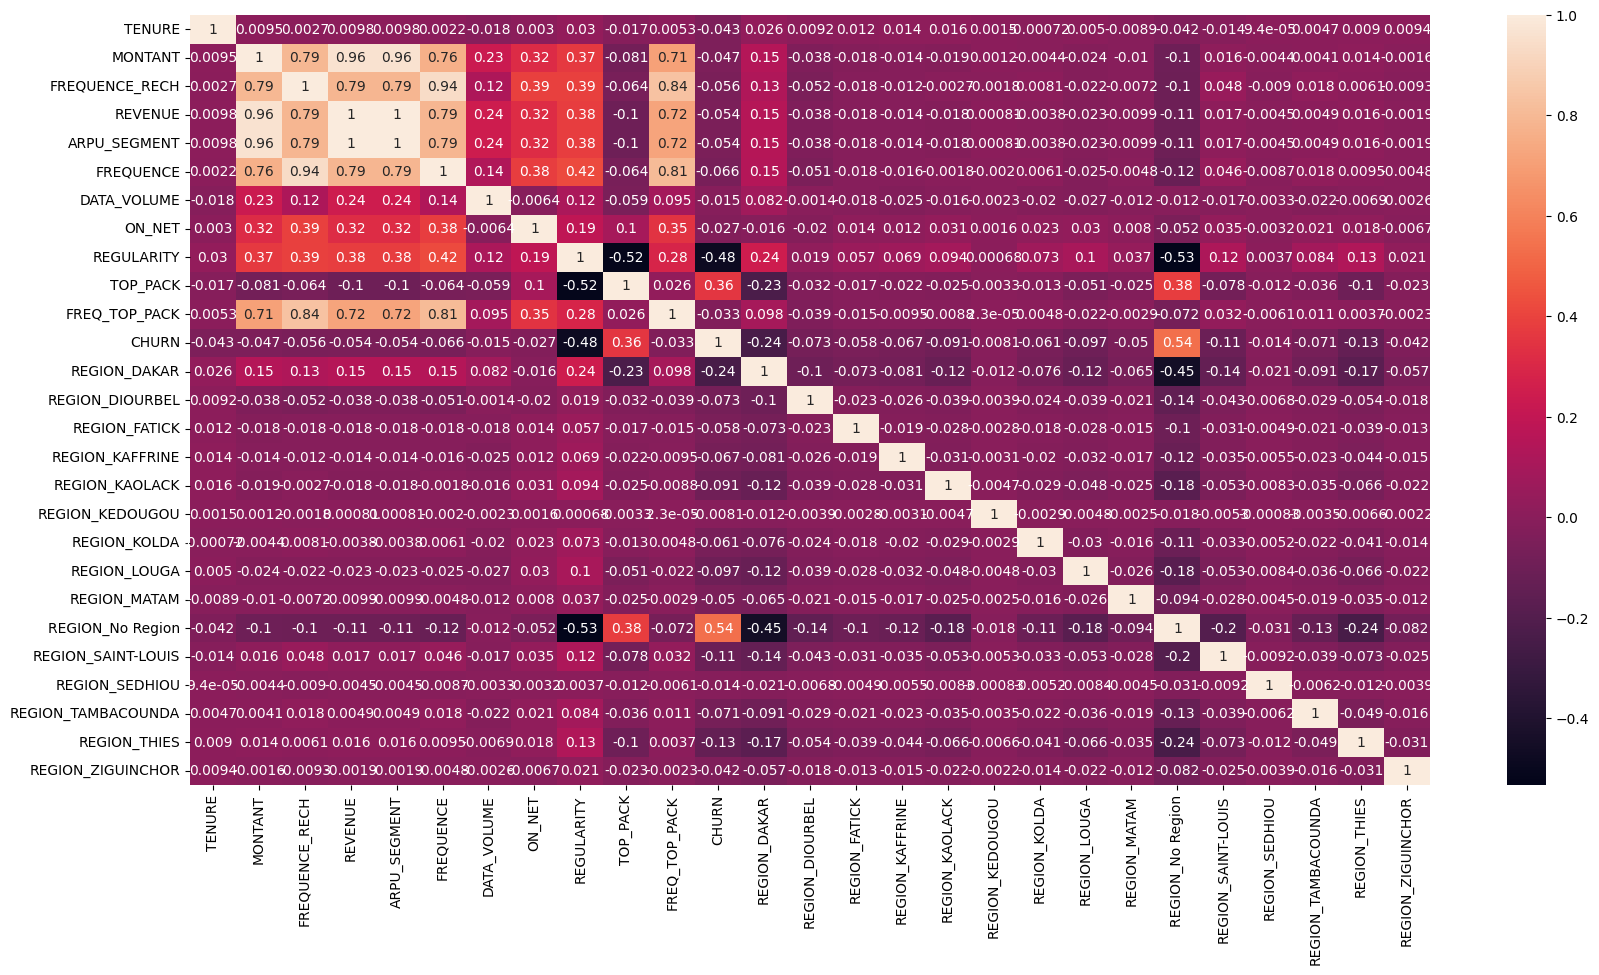

In [83]:
#Visualization of correlation using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dummy_df.corr(), annot= True)
plt.show()

In [84]:
#Storing the correlation df into a variable
corr_matrix = dummy_df.corr()

In [85]:
#Storing the absolute values of CHURN column with other columns
corr_table = abs(corr_matrix["CHURN"]).sort_values(ascending=False)

In [86]:
#Dropping the CHURN row (because of the you don't need the correlation with itself)
corr_table.drop(index = "CHURN", inplace = True )

In [87]:
#saving the columns of the corr_table that are greater than 0.1 i.e columns that can be said to be significant in this dataset.
pred_colums = corr_table.loc[corr_table > 0.1].index

In [88]:
#Defining you X and y variables
x = dummy_df[pred_colums]

y = dummy_df["CHURN"]

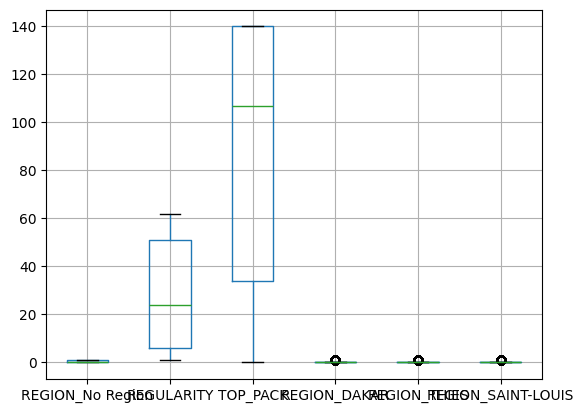

In [89]:
#Checking for outliers in the Independent Variable
x.boxplot()
plt.show()

In [90]:
scaler = QuantileTransformer()

x_scaled = scaler.fit_transform(x)

In [91]:
#Counting the number of O and 1 in the dataframe
y.value_counts()/y.shape[0]*100

CHURN
0    81.245265
1    18.754735
Name: count, dtype: float64

In [92]:
#Filling the NaN values
for cols in dummy_df.select_dtypes("number").columns:
  dummy_df[cols]= dummy_df[cols].fillna(0)

In [93]:
#Checking for the correlation after the data has been scaled and NaN values are treated
new_corr_matrix = dummy_df.corr()

In [94]:
#Getting the absolute correlation values  i.e ignoring the negative signs first in order to know the significance of each columns
corr_table = abs(new_corr_matrix["CHURN"])

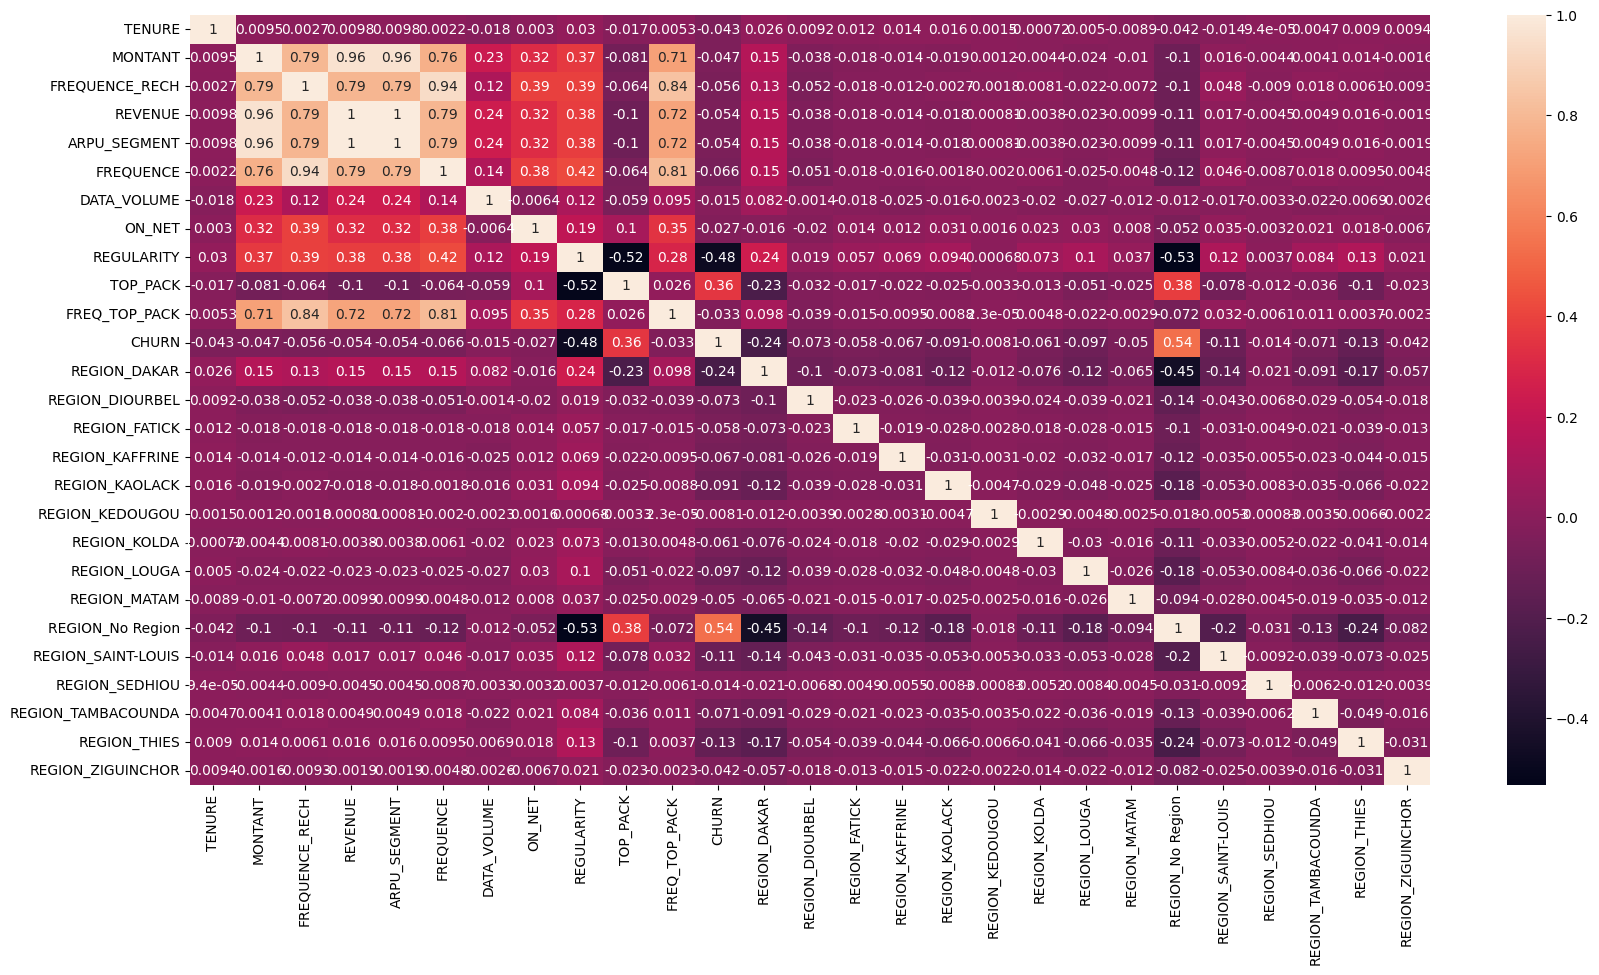

In [95]:
#Visualizing the new are worked one dataframe
plt.figure(figsize=(20,10))
sns.heatmap(dummy_df.corr(), annot= True)
plt.show()

### MODEL PHASE

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [97]:
x.isnull().sum()

REGION_No Region      0
REGULARITY            0
TOP_PACK              0
REGION_DAKAR          0
REGION_THIES          0
REGION_SAINT-LOUIS    0
dtype: int64

In [98]:

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

test_preds = log_reg.predict(X_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92    350013
           1       0.67      0.68      0.68     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.80      0.80    430810
weighted avg       0.88      0.88      0.88    430810



In [99]:


rdf = RandomForestClassifier()

rdf.fit(X_train, y_train)

test_preds = rdf.predict(X_test)

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.69      0.64      0.66     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.78      0.79    430810
weighted avg       0.87      0.88      0.88    430810



In [100]:
train_preds = rdf.predict(X_train)

print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1400049
           1       0.69      0.64      0.66    323189

    accuracy                           0.88   1723238
   macro avg       0.80      0.79      0.79   1723238
weighted avg       0.87      0.88      0.88   1723238



In [101]:
pd.DataFrame(rdf.feature_importances_, index=x.columns, columns=["Importances"]).sort_values(by="Importances", ascending=False)

,Importances
REGULARITY,0.468033
REGION_No Region,0.347042
TOP_PACK,0.138644
REGION_DAKAR,0.033399
REGION_THIES,0.009986
REGION_SAINT-LOUIS,0.002896


In [102]:


dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)


train_preds = dec_tree.predict(X_train)
print(classification_report(y_train, train_preds))


test_preds = dec_tree.predict(X_test)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1400049
           1       0.69      0.64      0.66    323189

    accuracy                           0.88   1723238
   macro avg       0.80      0.78      0.79   1723238
weighted avg       0.87      0.88      0.88   1723238

              precision    recall  f1-score   support

           0       0.92      0.93      0.93    350013
           1       0.69      0.63      0.66     80797

    accuracy                           0.88    430810
   macro avg       0.80      0.78      0.79    430810
weighted avg       0.87      0.88      0.88    430810



In [104]:
with open("my_log_model.pkl", "wb") as file:
    joblib.dump(log_reg, file)